# State compression
Compress a higher-order network of air traffic

## Original second-order network

In [1]:
import sys
sys.path.append("../Infomap/build/py/")
import infomap

In [26]:
from collections import namedtuple
InfomapResult = namedtuple('InfomapResult', 'name numNodes numStateNodes numLevels codelength')

def getInfomapResult(infomapWrapper, name):
    tree = infomapWrapper.tree
    network = infomapWrapper.network
    return InfomapResult(name, network.numNodes(), network.numStateNodes(), tree.maxDepth(), tree.codelength())

def printInfomapResult(result):
    print("%s: %d nodes in %d states partitioned with codelength %.3f in %d levels." % (result.name, result.numNodes, result.numStateNodes, result.codelength, result.numLevels))

In [77]:
infomapWrapper = infomap.MemInfomap("-i 3gram -dk --skip-complete-dangling-memory-nodes")

infomapWrapper.readInputData("./air2011paths_3grams.net")

infomapWrapper.run()

0

In [78]:
originalResult = getInfomapResult(infomapWrapper, "original")
printInfomapResult(originalResult)

original: 464 nodes in 18436 states partitioned with codelength 5.387 in 5 levels.


## Compress second-order state nodes

In [1]:
!./compress air2011paths_3grams.net output/

Run compress....
networkPath: air2011paths_3grams.net
outPath: output/
limit: 1000000
increase: 1.250000
zero based: false
Parse network....
Build map....
Build tree....
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 23

In [3]:
!ls output/

10465.net 1409.net  1760.net  2747.net  4290.net  5361.net  6699.net  8373.net
1129.net  17488.net 2199.net  3433.net  465.net   580.net   724.net   904.net


In [7]:
!head -n7 output/465.net

# Number of states: 465
# Compression ratio: 1.25881
# Conditional entropy: 5.24327
# First order conditional entropy: 5.24327
# Second order conditional entropy: 4.16527
# 1st order nodes: 460
# 2nd order nodes: 17483


In [38]:
stateNetworks = !ls output/
stateNetworks = sorted(stateNetworks, key=lambda filename: int(filename.replace(".net", "")))

In [70]:
def runStateNetwork(filename):
    infomapWrapper = infomap.MemInfomap("-i states -dk --skip-complete-dangling-memory-nodes")

    infomapWrapper.readInputData("./output/{}".format(filename))

    infomapWrapper.run()

    return getInfomapResult(infomapWrapper, filename.replace(".net", " states"))

In [71]:
infomapResults = []
for filename in stateNetworks:
    infomapResults.append(runStateNetwork(filename))

In [82]:
infomapResults.append(originalResult)

In [83]:
import pandas as pd

In [84]:
result = pd.DataFrame(infomapResults)
result

,name,numNodes,numStateNodes,numLevels,codelength
0,465 states,464,464,2,6.316740
1,580 states,464,579,2,6.426455
2,724 states,464,723,2,6.437947
3,904 states,464,903,2,6.434379
4,1129 states,464,1128,2,6.428054
5,1409 states,464,1408,2,6.435656
6,1760 states,464,1759,2,6.368341
7,2199 states,464,2198,2,6.239505
8,2747 states,464,2746,3,6.093051
9,3433 states,464,3432,4,5.973520


In [85]:
import matplotlib.pyplot as plt
# Draw plots within the notebook:
%matplotlib inline
import seaborn as sns
sns.set() # Set nice defaults to matplotlib

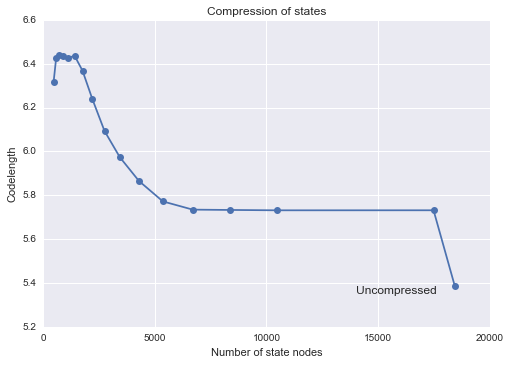

In [89]:
plt.plot(result['numStateNodes'], result['codelength'], '-o')
plt.xlabel('Number of state nodes')
plt.ylabel('Codelength')
plt.title('Compression of states')
plt.text(14000, 5.35, 'Uncompressed')